In [628]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Problem 1: Clustering

In [629]:
df = pd.read_csv('bank_marketing_part1_Data.csv')

In [630]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [631]:
df.shape

(210, 7)

In [632]:
df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [633]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [634]:
df.duplicated().sum()

0

## Univariate Analysis

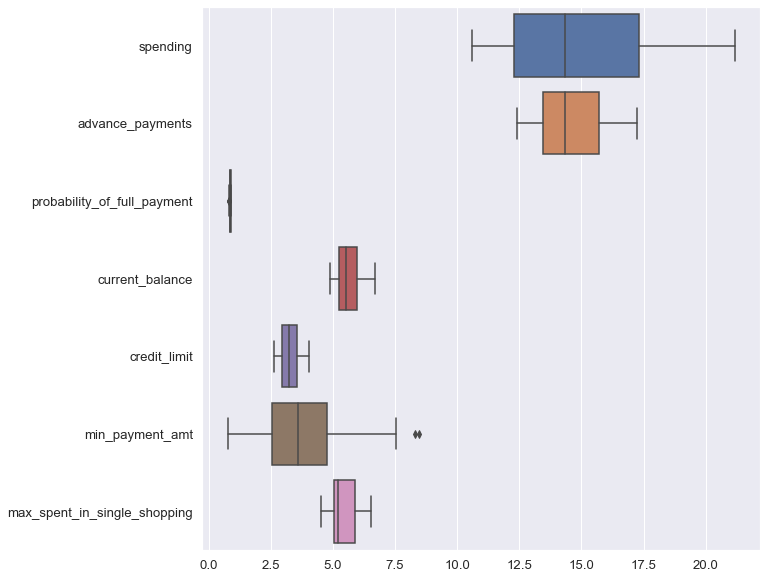

In [635]:
plt.figure(figsize=(10,10))
sns.boxplot(data = df, orient = 'h')

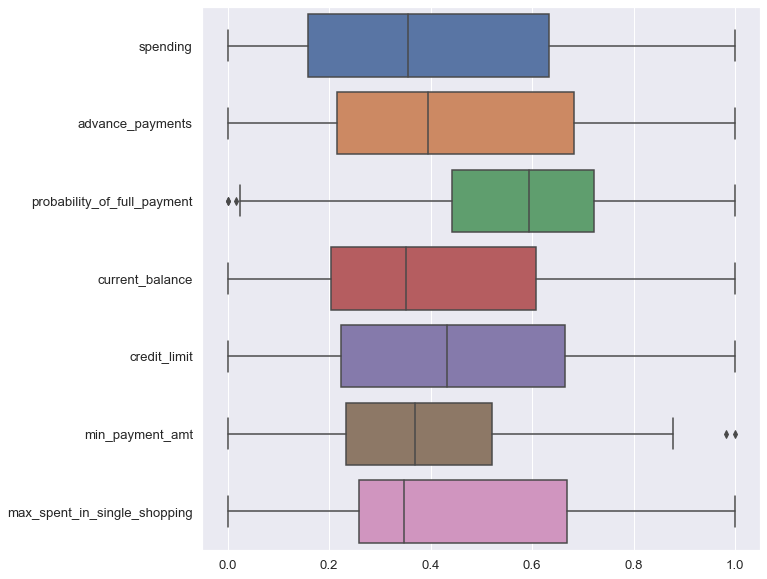

In [636]:
plt.figure(figsize=(10,10))
sns.boxplot(data = df_scaled, orient = 'h')

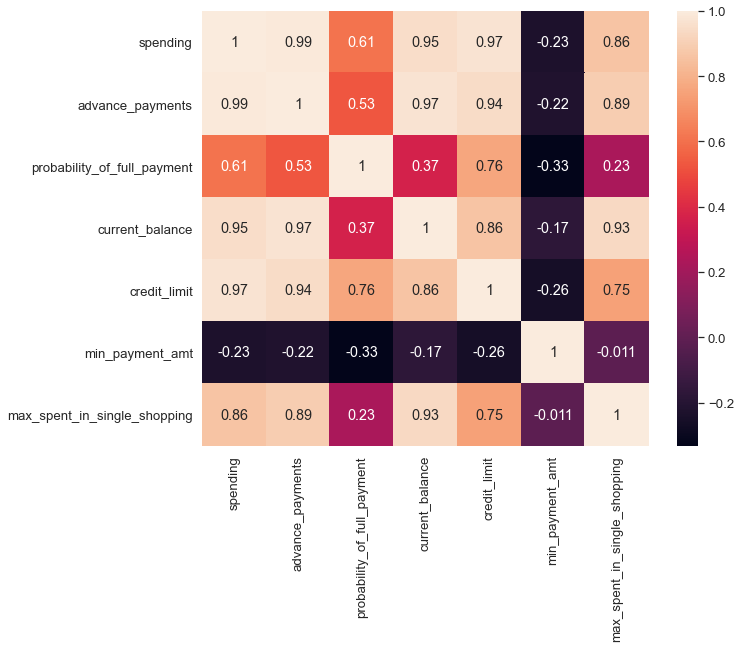

In [637]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(df.corr(), annot=True)


## Correlation inference
1. probability_of_full_payment vs spending
2. spending vs current balace
3. spending vs credit limit
4. max spent in single shopping
5. spending vs advance payment 
2. probability of full payment vs advance payment
3. probability of full payment vs crediut limit
4. current balance vs credit limit
5. max spent in single shopping vs spending
6. spending vs advance payment

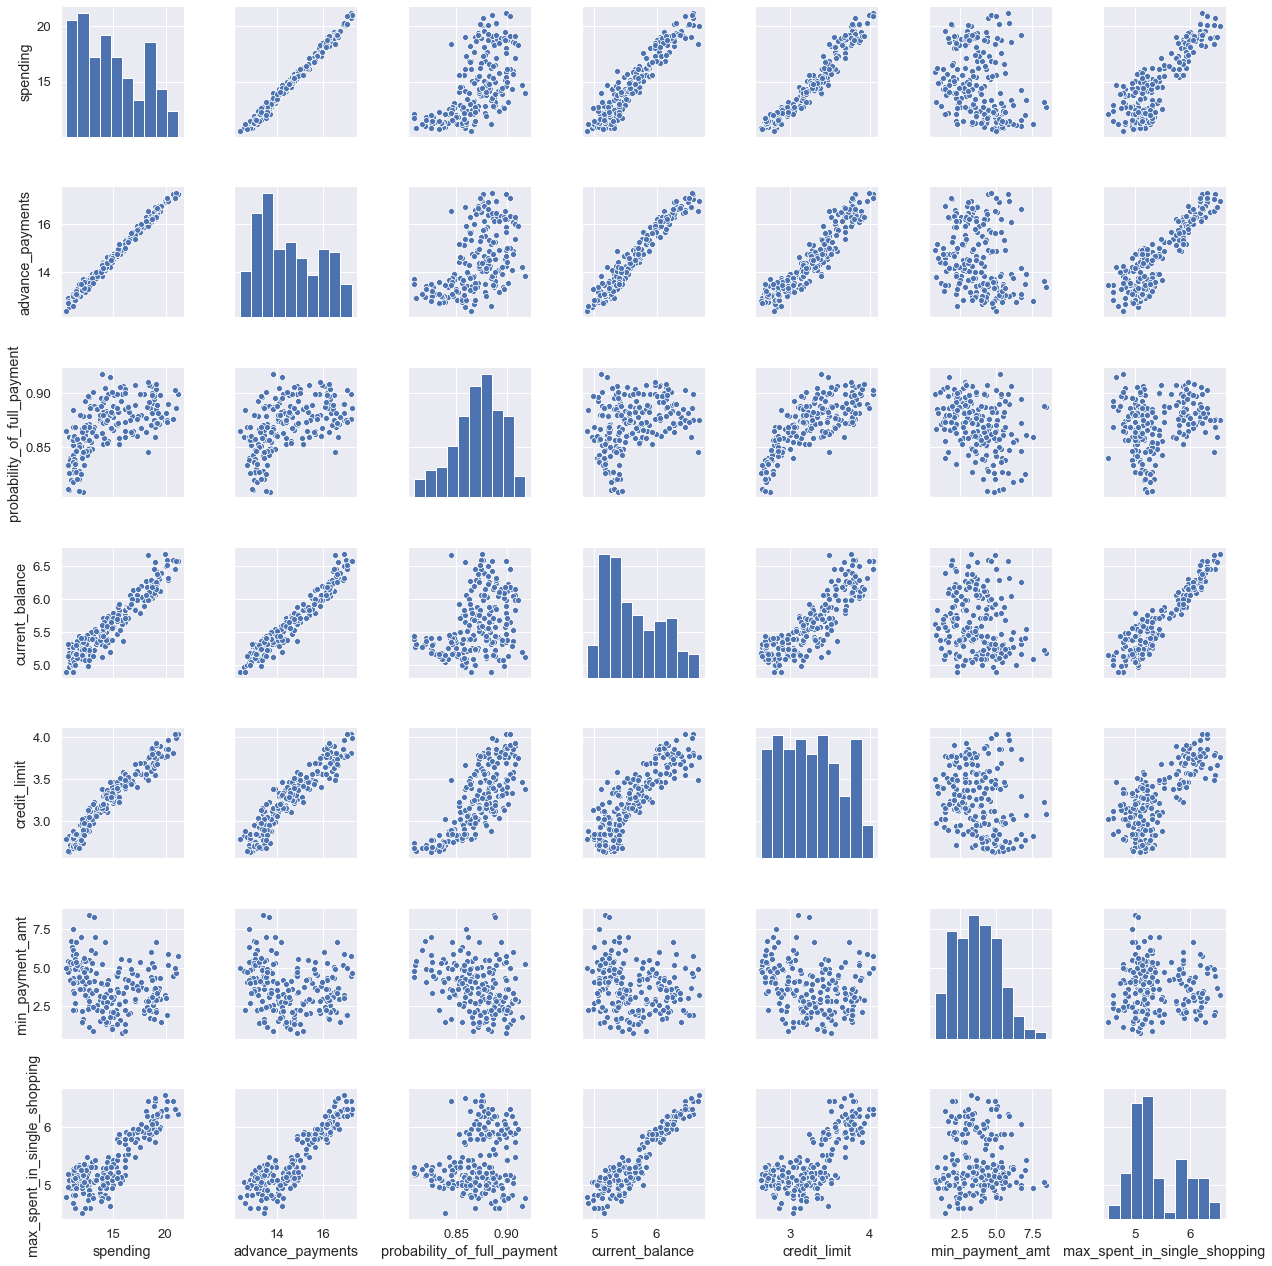

In [638]:

sns.pairplot(df)
plt.show()

In [639]:
df_scaled =df.copy()

In [640]:

from sklearn.preprocessing import MinMaxScaler
##df_scaled = df.apply(zscore)


scaler = MinMaxScaler()

df_scaled[df_scaled.columns] = scaler.fit_transform(df_scaled)

In [641]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [642]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [643]:
link_method = linkage(df_scaled, method = 'ward')

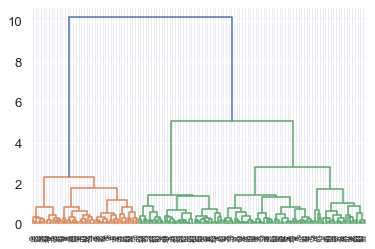

In [644]:
dend = dendrogram(link_method)

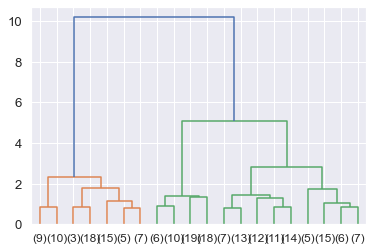

In [645]:
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 20,
                 )

In [646]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(link_method, 3, criterion='maxclust')
clusters


array([1, 2, 1, 3, 1, 3, 3, 3, 1, 3, 1, 2, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3,
       1, 3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 1,
       3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 1, 2, 3, 3, 2, 2, 1,
       1, 2, 1, 3, 2, 3, 1, 1, 3, 1, 2, 3, 1, 2, 2, 3, 2, 1, 3, 2, 2, 1,
       1, 3, 3, 1, 2, 3, 3, 1, 1, 1, 3, 1, 3, 1, 2, 1, 2, 1, 1, 3, 3, 1,
       2, 2, 1, 3, 3, 1, 2, 3, 3, 1, 3, 3, 3, 3, 2, 2, 1, 3, 2, 2, 3, 2,
       3, 1, 3, 1, 1, 3, 1, 2, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 2, 2,
       3, 2, 3, 3, 2, 1, 1, 3, 1, 1, 1, 3, 1, 2, 3, 3, 2, 3, 2, 1, 1, 1,
       2, 3, 2, 3, 2, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 2, 3, 1, 2, 1, 1, 3,
       1, 3, 2, 1, 2, 3, 1, 2, 1, 2, 2, 2], dtype=int32)

In [647]:
df['clusters'] = clusters
df

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,3
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1
...,...,...,...,...,...,...,...,...
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738,2
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795,1
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,2
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443,2


In [648]:
df1 = df.groupby(clusters).mean()
df1['Freq'] = df['clusters'].value_counts().sort_index()
df1

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Freq
1,18.452537,16.184776,0.884042,6.173567,3.692060,3.696179,6.037224,1,67
2,14.903019,14.571132,0.881602,5.595660,3.314755,2.480757,5.206698,2,53
3,12.131111,13.342222,0.855044,5.242144,2.902856,4.421312,5.058289,3,90


## On the basis of spending 
1. We will Assign Cluster 1 ( mean Spending of more than 18000 ) as Platinum Customer
2. We will  Assign Cluster 2 ( mean spending of 14000) as Gold Customer
3. We will Assign Cluster 3 ( mean spending of 120000 ) as Silver Customer

In [649]:
df1['clusters'].replace( [1,3,2], ['Platinum Customer','Silver Customer','Gold Customer'], inplace = True)

In [650]:
df['clusters'].replace( [1,3,2], ['Platinum Customer','Silver Customer','Gold Customer'], inplace = True)

In [651]:
df1

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Freq
1,18.452537,16.184776,0.884042,6.173567,3.692060,3.696179,6.037224,Platinum Customer,67
2,14.903019,14.571132,0.881602,5.595660,3.314755,2.480757,5.206698,Gold Customer,53
3,12.131111,13.342222,0.855044,5.242144,2.902856,4.421312,5.058289,Silver Customer,90


In [652]:
df

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,Platinum Customer
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,Gold Customer
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,Platinum Customer
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,Silver Customer
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,Platinum Customer
...,...,...,...,...,...,...,...,...
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738,Gold Customer
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795,Platinum Customer
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,Gold Customer
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443,Gold Customer


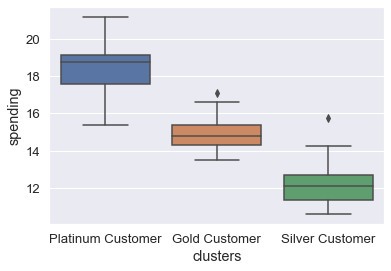

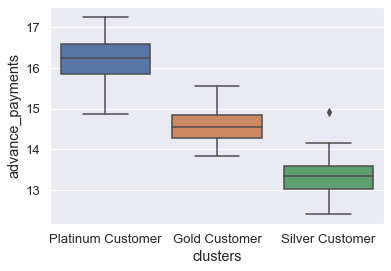

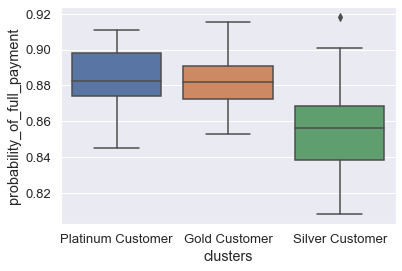

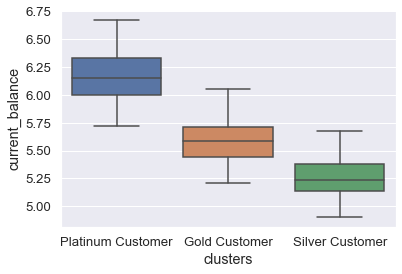

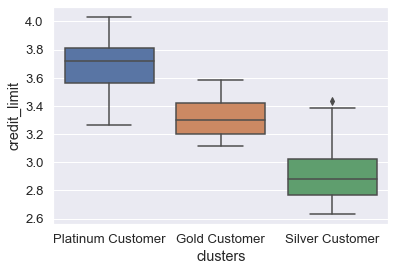

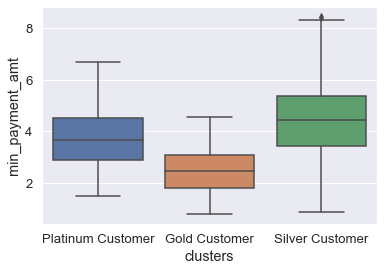

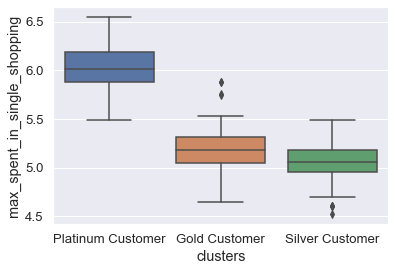

ValueError: Neither the `x` nor `y` variable appears to be numeric.

In [733]:
for i in df:
    sns.boxplot(x= 'clusters',y = i, data = df)
    plt.show()

## K Means Clustering

In [667]:
df_new = pd.read_csv('bank_marketing_part1_Data.csv')

In [668]:
scaled_df_new =df_new.copy()

In [669]:
from sklearn.preprocessing import MinMaxScaler
##df_scaled = df.apply(zscore)


scaler = MinMaxScaler()

scaled_df_new[scaled_df_new.columns] = scaler.fit_transform(scaled_df_new)

In [670]:
scaled_df_new

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,0.882908,0.931818,0.608893,1.000000,0.807555,0.323356,1.000000
1,0.509915,0.512397,0.892015,0.261261,0.678546,0.334278,0.307730
2,0.789424,0.828512,0.678766,0.759572,0.801853,0.338439,0.802068
3,0.022663,0.113636,0.016334,0.213401,0.007840,0.574302,0.327917
4,0.698772,0.712810,0.826679,0.557995,0.758375,0.169408,0.648941
...,...,...,...,...,...,...,...
205,0.311615,0.332645,0.725045,0.304054,0.405560,0.418794,0.107829
206,0.583569,0.663223,0.505445,0.578829,0.575909,0.540236,0.628262
207,0.324835,0.361570,0.648820,0.303491,0.406985,0.123770,0.237322
208,0.522191,0.535124,0.833938,0.456081,0.609408,0.195673,0.454948


In [671]:
from sklearn.cluster import KMeans 
k_means = KMeans(n_clusters = 2)

In [672]:
k_means.fit(scaled_df_new)

KMeans(n_clusters=2)

In [673]:
k_means.labels_

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0])

In [674]:
k_means.inertia_

34.81326792694562

In [675]:
k_means = KMeans(n_clusters = 1)
k_means.fit(scaled_df_new)
k_means.inertia_

88.98592483911841

In [676]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df_new)
k_means.inertia_

22.024363075666038

In [677]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df_new)
k_means.inertia_

18.651334975927295

In [678]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_df_new)
k_means.inertia_

16.186913485632534

In [679]:
wss=[]

In [680]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df_new)
    wss.append(KM.inertia_)

In [681]:
wss

[88.98592483911841,
 34.81326792694562,
 22.024363075666038,
 18.67913890363691,
 16.192243478564443,
 14.5941357878596,
 13.12066649478353,
 12.031333665598083,
 11.138332777291613,
 10.283825775093987]

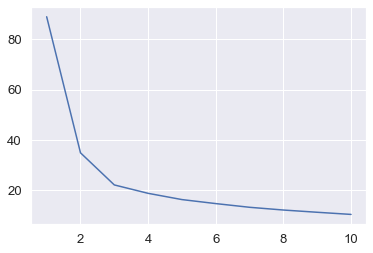

In [682]:
plt.plot(range(1,11), wss)

In [683]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df_new)
labels = k_means.labels_

In [684]:
df_new['K_clust'] = labels
df_new.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,K_clust
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,0
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,0
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,0


In [685]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [686]:
silhouette_score(scaled_df_new,labels)

0.42210525681247923

In [687]:
sil_width = silhouette_samples(scaled_df_new,labels)

In [688]:
sil_width



array([0.594242  , 0.41964259, 0.66557523, 0.52343556, 0.39942394,
       0.20784759, 0.50980651, 0.29222872, 0.54354525, 0.57711039,
       0.52696853, 0.22337267, 0.44236142, 0.56047625, 0.12826612,
       0.24222199, 0.37299552, 0.53675322, 0.06268456, 0.31104716,
       0.43090061, 0.31530685, 0.46721577, 0.337122  , 0.54160611,
       0.08098937, 0.09333586, 0.51400494, 0.57686516, 0.4622207 ,
       0.32795942, 0.51379228, 0.41567745, 0.43480245, 0.55101119,
       0.56350194, 0.53080522, 0.44316811, 0.5072196 , 0.65348274,
       0.60703843, 0.43907502, 0.37157409, 0.63564841, 0.52215541,
       0.4659816 , 0.17684732, 0.62519641, 0.51606056, 0.57389339,
       0.37301253, 0.52298645, 0.61380767, 0.62756883, 0.64812628,
       0.13117193, 0.4537905 , 0.55187661, 0.58922207, 0.59860592,
       0.56041594, 0.55056649, 0.58851857, 0.39058054, 0.47987886,
       0.60229694, 0.59616318, 0.49781569, 0.66259848, 0.25188687,
       0.36527496, 0.38324137, 0.58025987, 0.61254594, 0.22645

In [689]:
silhouette_samples(scaled_df_new,labels).min()

0.004601020857671655

In [690]:
df_new1 = df_new.groupby('K_clust').mean()
df_new1['Freq'] = df_new['K_clust'].value_counts().sort_index()
df_new1.reset_index(inplace = True)
df_new1

,K_clust,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
0,0,18.610156,16.251719,0.884600,6.195547,3.709609,3.592094,6.056656,64
1,1,11.896104,13.257662,0.849775,5.230597,2.858026,4.599545,5.086234,77
2,2,14.651159,14.442029,0.882067,5.546681,3.287304,2.796858,5.165638,69


In [691]:

df_new['K_clust'].replace( [0,1,2], ['Platinum Customer','Silver Customer','Gold Customer'], inplace = True)
df_new1['K_clust'].replace( [0,1,2], ['Platinum Customer','Silver Customer','Gold Customer'], inplace = True)

In [694]:
df_new1

       

,K_clust,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
0,Platinum Customer,18.610156,16.251719,0.884600,6.195547,3.709609,3.592094,6.056656,64
1,Silver Customer,11.896104,13.257662,0.849775,5.230597,2.858026,4.599545,5.086234,77
2,Gold Customer,14.651159,14.442029,0.882067,5.546681,3.287304,2.796858,5.165638,69


In [730]:
df_new1.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,15.052473,14.650470,0.872147,5.657608,3.284980,3.662832,5.436176,70.000000
std,3.374969,1.507872,0.019416,0.491946,0.425796,0.903423,0.538816,6.557439
min,11.896104,13.257662,0.849775,5.230597,2.858026,2.796858,5.086234,64.000000
25%,13.273632,13.849846,0.865921,5.388639,3.072665,3.194476,5.125936,66.500000
50%,14.651159,14.442029,0.882067,5.546681,3.287304,3.592094,5.165638,69.000000
75%,16.630658,15.346874,0.883333,5.871114,3.498457,4.095820,5.611147,73.000000
max,18.610156,16.251719,0.884600,6.195547,3.709609,4.599545,6.056656,77.000000


In [732]:
df1.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,15.162222,14.699377,0.873563,5.670457,3.303223,3.532749,5.434070,70.000000
std,3.168674,1.425610,0.016084,0.470195,0.394728,0.980546,0.527591,18.681542
min,12.131111,13.342222,0.855044,5.242144,2.902856,2.480757,5.058289,53.000000
25%,13.517065,13.956677,0.868323,5.418902,3.108805,3.088468,5.132494,60.000000
50%,14.903019,14.571132,0.881602,5.595660,3.314755,3.696179,5.206698,67.000000
75%,16.677778,15.377954,0.882822,5.884614,3.503407,4.058746,5.621961,78.500000
max,18.452537,16.184776,0.884042,6.173567,3.692060,4.421312,6.037224,90.000000


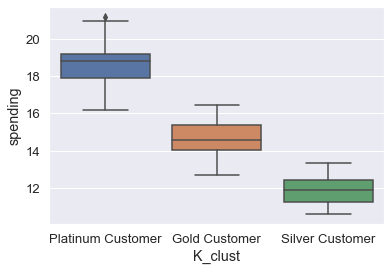

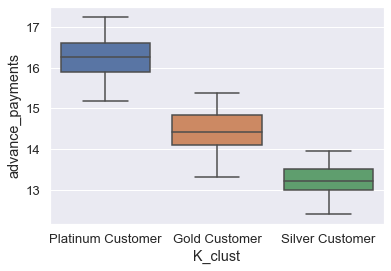

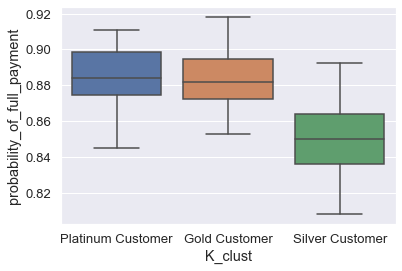

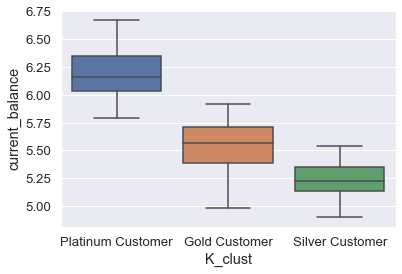

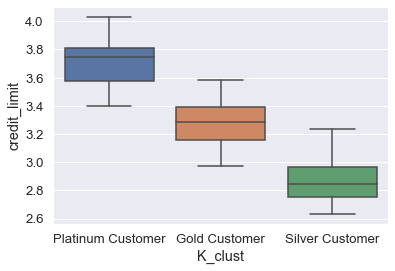

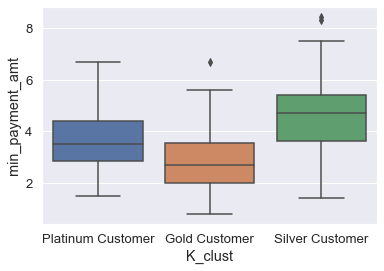

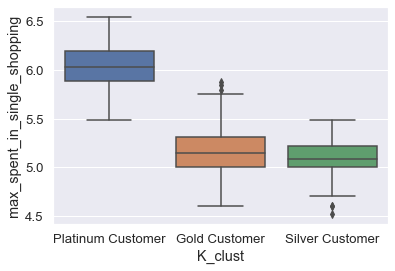

ValueError: Neither the `x` nor `y` variable appears to be numeric.

In [548]:
for i in df_new.columns:
    sns.boxplot(x= 'K_clust',y = i, data = df_new)
    plt.show()

## Problem 2: CART-RF-ANN

In [710]:
df_ins = pd.read_csv('insurance_part2_data.csv')

In [711]:
df_ins.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [712]:
df_ins.Claimed.value_counts(normalize = True)

No     0.692
Yes    0.308
Name: Claimed, dtype: float64

In [713]:
df_ins.Channel.unique()

array(['Online', 'Offline'], dtype=object)

In [714]:
df_ins.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


In [715]:
df_ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [716]:
dups = df_ins.duplicated()
df_ins[dups]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [717]:
df_ins.drop_duplicates(inplace=True) 

In [718]:
df_ins.describe()

,Age,Commision,Duration,Sales
count,2861.000000,2861.000000,2861.000000,2861.000000
mean,38.204124,15.080996,72.120238,61.757878
std,10.678106,25.826834,135.977200,71.399740
min,8.000000,0.000000,-1.000000,0.000000
25%,31.000000,0.000000,12.000000,20.000000
50%,36.000000,5.630000,28.000000,33.500000
75%,43.000000,17.820000,66.000000,69.300000
max,84.000000,210.210000,4580.000000,539.000000


## To select certain data with certain conditions
df_ins = df_ins.loc[df_ins['Duration'] > 0]

In [719]:
df_ins.drop(df_ins[df_ins['Duration'] <= 0].index, inplace = True)

In [720]:
df_ins.describe()

,Age,Commision,Duration,Sales
count,2858.000000,2858.000000,2858.000000,2858.000000
mean,38.205738,15.077218,72.196291,61.772841
std,10.679258,25.830284,136.028290,71.413840
min,8.000000,0.000000,1.000000,0.000000
25%,31.000000,0.000000,12.000000,20.000000
50%,36.000000,5.630000,28.000000,33.500000
75%,43.000000,17.820000,66.000000,69.300000
max,84.000000,210.210000,4580.000000,539.000000


In [721]:
df_ins.drop(df_ins[df_ins['Sales'] <= 0].index, inplace = True)


In [722]:
df_ins.describe()

,Age,Commision,Duration,Sales
count,2806.000000,2806.000000,2806.000000,2806.000000
mean,38.268710,14.971565,72.790093,62.917598
std,10.714499,25.798393,137.090500,71.571152
min,8.000000,0.000000,1.000000,0.190000
25%,32.000000,0.000000,12.000000,21.000000
50%,36.000000,5.530000,28.000000,34.800000
75%,43.000000,17.820000,66.000000,69.300000
max,84.000000,210.210000,4580.000000,539.000000


In [723]:
df_ins[df_ins["Duration"] > 450]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2845,48,C2B,Airlines,No,0.09,Online,4580,0.32,Customised Plan,ASIA
2914,64,CWT,Travel Agency,No,90.09,Online,466,138.60,Silver Plan,ASIA


In [724]:
df_ins.drop(df_ins[df_ins['Duration'] > 500].index, inplace = True)

In [725]:
df_ins.describe()

,Age,Commision,Duration,Sales
count,2805.000000,2805.000000,2805.000000,2805.000000
mean,38.265241,14.976870,71.183244,62.939914
std,10.714833,25.801462,107.484597,71.574148
min,8.000000,0.000000,1.000000,0.190000
25%,32.000000,0.000000,12.000000,21.000000
50%,36.000000,5.530000,28.000000,34.800000
75%,43.000000,17.820000,66.000000,69.300000
max,84.000000,210.210000,466.000000,539.000000


In [726]:
df2num = df_ins.select_dtypes(include = ['float64','int64'] )
numlist = list(df2num.columns.values)

df2cat = df_ins.select_dtypes(include = ['object'] )
catlist = list(df2cat.columns.values)

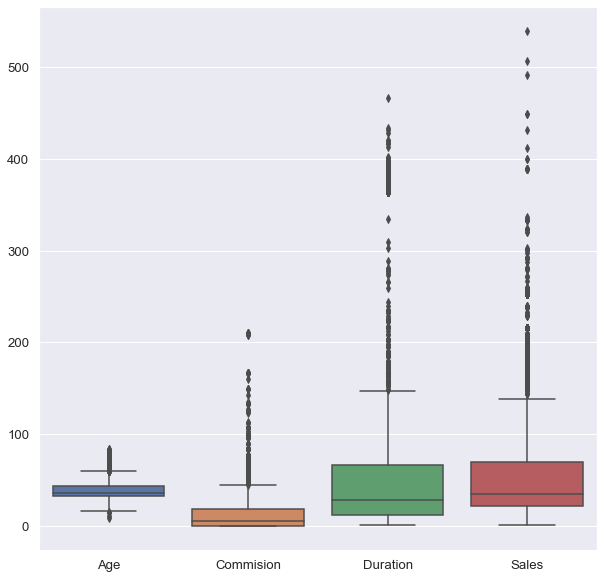

In [735]:
plt.figure(figsize=(10,10))
sns.boxplot(data = df_ins)

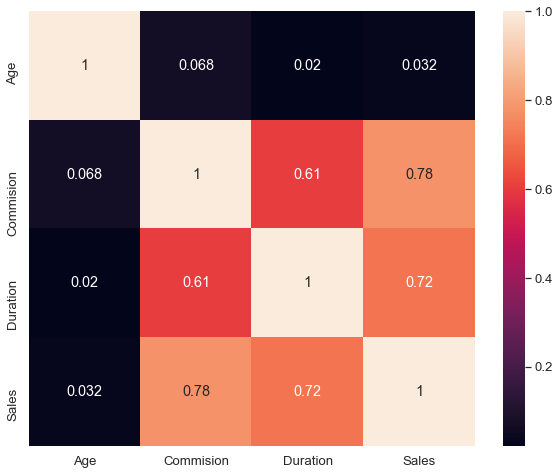

In [736]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(df_ins.corr(), annot=True)

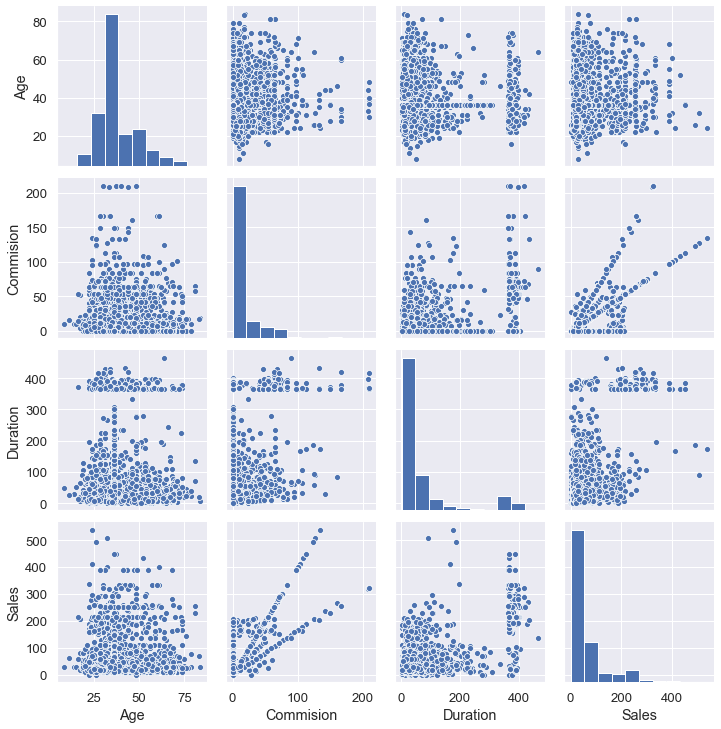

In [737]:
sns.pairplot(data = df_ins)

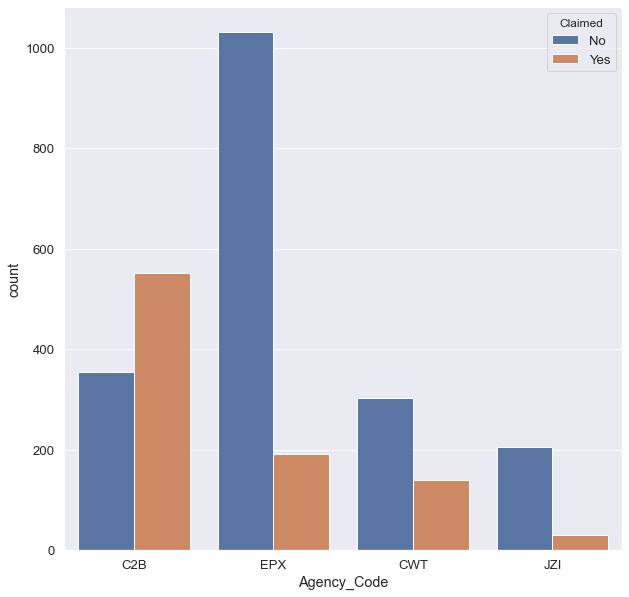

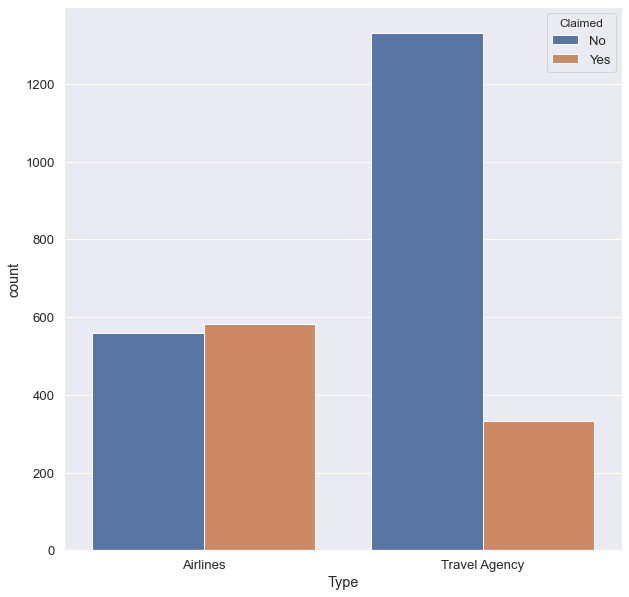

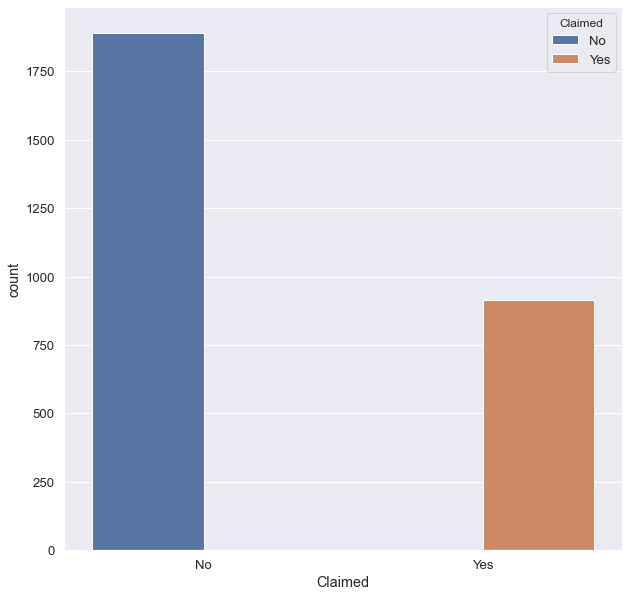

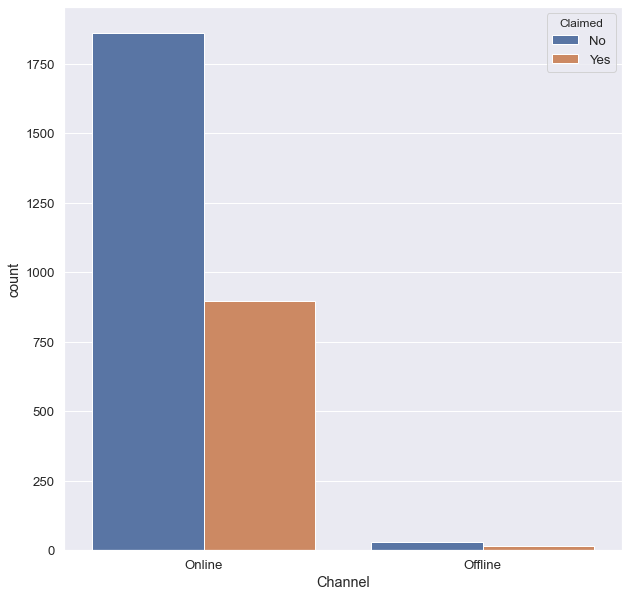

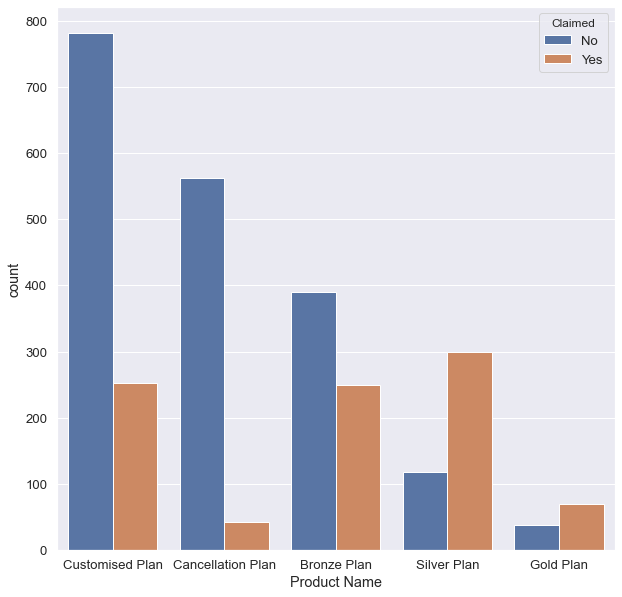

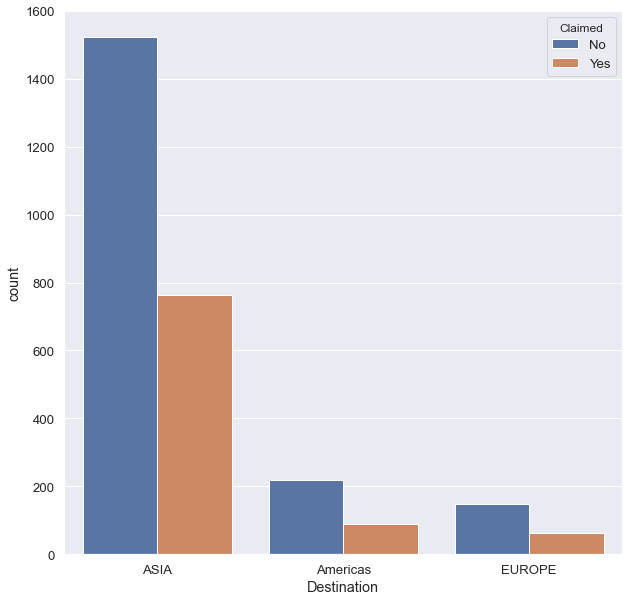

In [739]:
for j in catlist :
     plt.figure(figsize=(10,10))
     sns.countplot (x=j, hue='Claimed' , data = df_ins)
     plt.show()

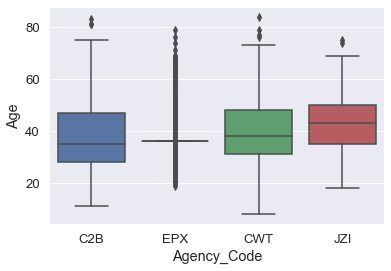

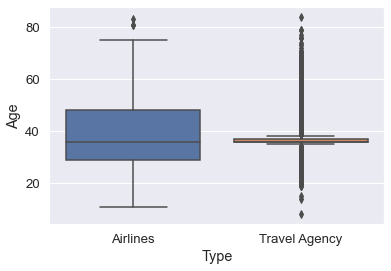

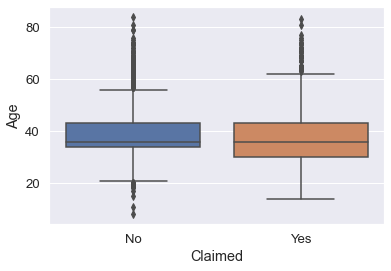

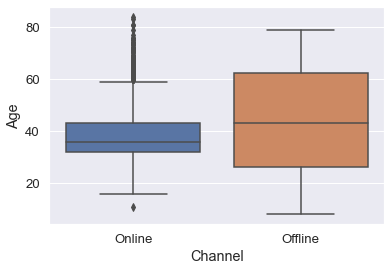

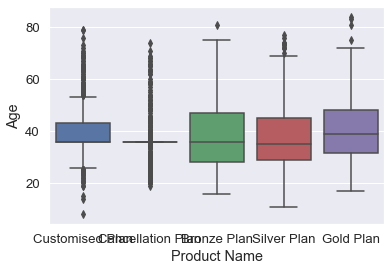

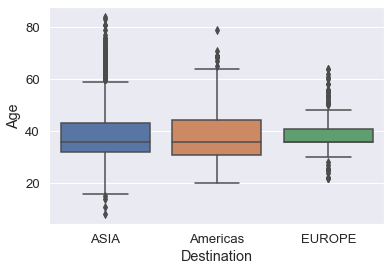

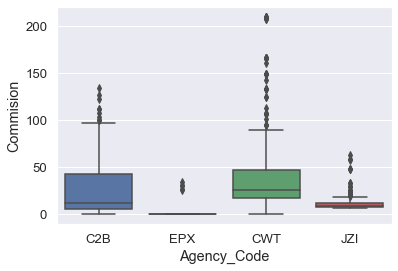

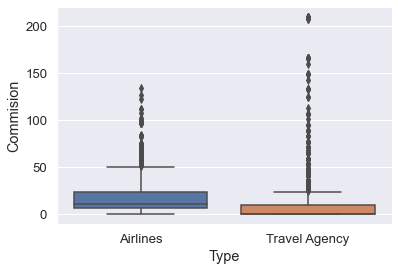

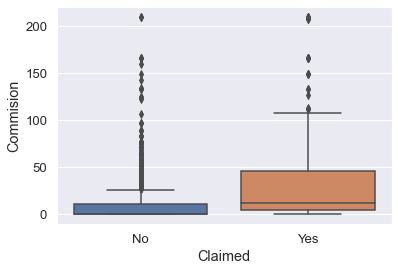

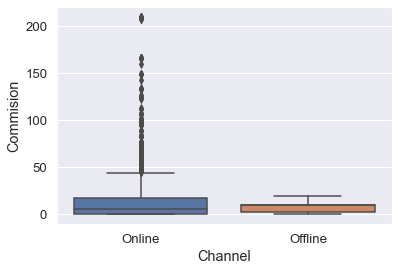

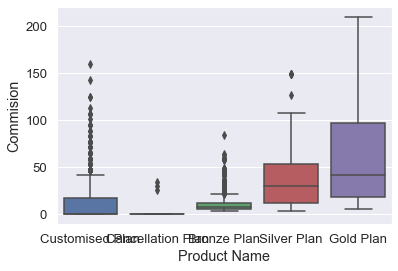

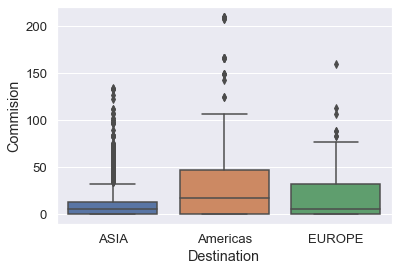

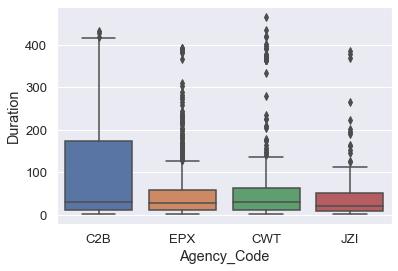

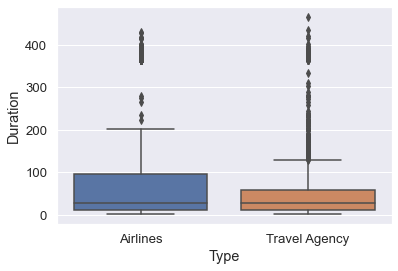

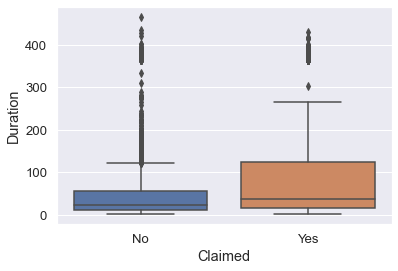

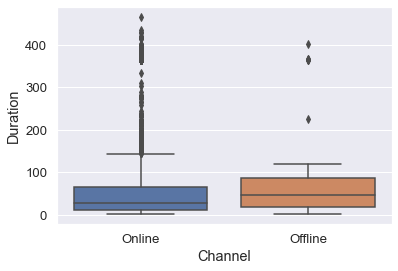

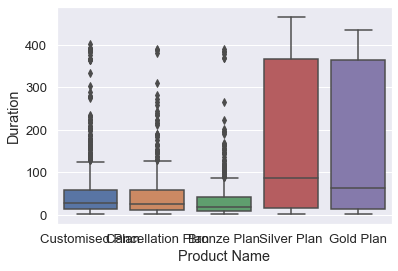

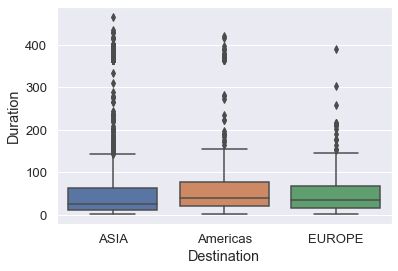

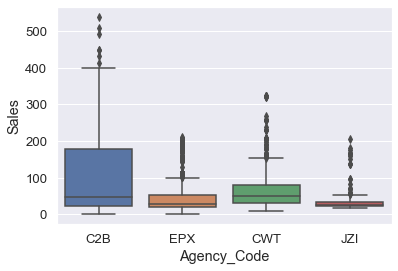

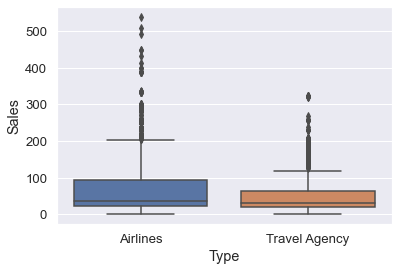

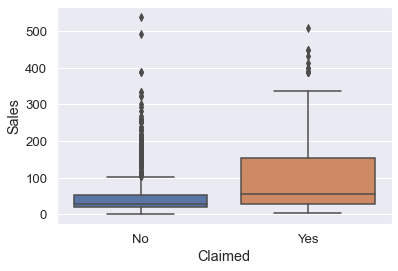

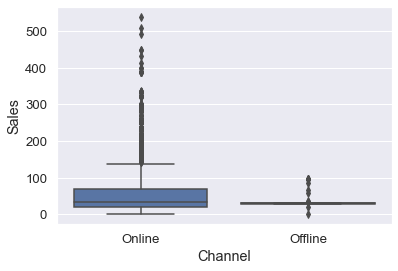

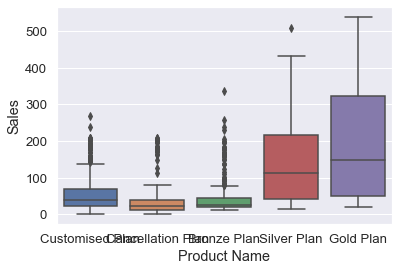

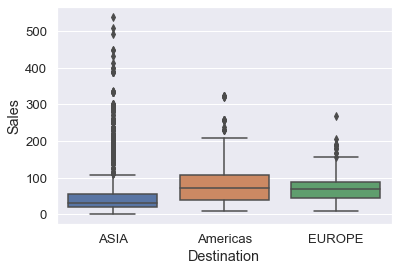

In [728]:
for i in numlist :
    for j in catlist :
     plt.figure()
     sns.boxplot (x=j, y= i, data = df_ins )
     plt.show()

In [276]:
for feature in df_ins.columns: 
    if df_ins[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df_ins[feature].unique()))
        print(pd.Categorical(df_ins[feature].unique()).codes)
        df_ins[feature] = pd.Categorical(df_ins[feature]).codes



feature: Agency_Code
[C2B, EPX, CWT, JZI]
Categories (4, object): [C2B, CWT, EPX, JZI]
[0 2 1 3]


feature: Type
[Airlines, Travel Agency]
Categories (2, object): [Airlines, Travel Agency]
[0 1]


feature: Claimed
[No, Yes]
Categories (2, object): [No, Yes]
[0 1]


feature: Channel
[Online, Offline]
Categories (2, object): [Offline, Online]
[1 0]


feature: Product Name
[Customised Plan, Cancellation Plan, Bronze Plan, Silver Plan, Gold Plan]
Categories (5, object): [Bronze Plan, Cancellation Plan, Customised Plan, Gold Plan, Silver Plan]
[2 1 0 4 3]


feature: Destination
[ASIA, Americas, EUROPE]
Categories (3, object): [ASIA, Americas, EUROPE]
[0 1 2]


In [277]:
df_ins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2805 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2805 non-null   int64  
 1   Agency_Code   2805 non-null   int8   
 2   Type          2805 non-null   int8   
 3   Claimed       2805 non-null   int8   
 4   Commision     2805 non-null   float64
 5   Channel       2805 non-null   int8   
 6   Duration      2805 non-null   int64  
 7   Sales         2805 non-null   float64
 8   Product Name  2805 non-null   int8   
 9   Destination   2805 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 206.0 KB


In [278]:
df_ins.Claimed.value_counts(normalize = True)

0    0.674153
1    0.325847
Name: Claimed, dtype: float64

In [279]:
X = df_ins.drop("Claimed", axis=1)

y = df_ins.pop("Claimed")

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


In [280]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Claimed, dtype: int8

In [281]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [282]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (1963, 9)
X_test (842, 9)
train_labels (1963,)
test_labels (842,)


## CART

In [283]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': ['gini'],
    'max_depth': [6,7,8,9,10],
    'min_samples_leaf': [10,20,30,35,40], 
    'min_samples_split': [75,100,125,150,300,450],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)

In [284]:
grid_search.fit(X_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid


{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 20, 'min_samples_split': 150}


DecisionTreeClassifier(max_depth=8, min_samples_leaf=20, min_samples_split=150,
                       random_state=1)

In [285]:
from sklearn import tree
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file= tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

tree_regularized.close()
dot_data

In [286]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.547837
Sales         0.194974
Product Name  0.126901
Commision     0.048601
Duration      0.041665
Age           0.040021
Type          0.000000
Channel       0.000000
Destination   0.000000


In [287]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [288]:

ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.142857,0.857143
1,0.784000,0.216000
2,0.913295,0.086705
3,0.913295,0.086705
4,0.360000,0.640000


## Model Evaluation
## AUC and ROC for the training data

AUC: 0.833


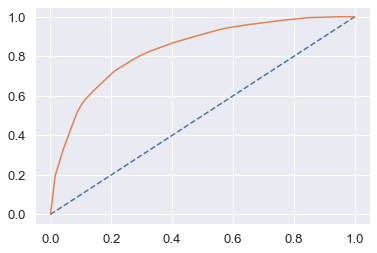

In [289]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
probs = best_grid.predict_proba(X_train)
probs = probs[:,1]
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0,1], [0,1], linestyle = '--')
plt.plot(cart_train_fpr, cart_train_tpr)

## AUC and ROC for the test data

AUC: 0.783


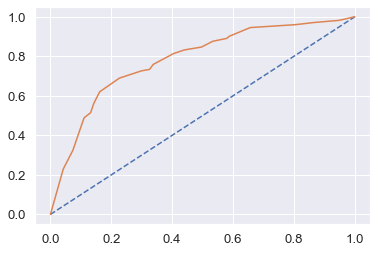

In [290]:
probs = best_grid.predict_proba(X_test)
probs = probs[:, 1]
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr)

## Confusion Matrix for the training data

In [291]:
confusion_matrix(train_labels, ytrain_predict)

array([[1186,  137],
       [ 282,  358]], dtype=int64)

In [292]:
cart_train_acc=best_grid.score(X_train,train_labels) 
cart_train_acc

0.7865511971472237

In [293]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1323
           1       0.72      0.56      0.63       640

    accuracy                           0.79      1963
   macro avg       0.77      0.73      0.74      1963
weighted avg       0.78      0.79      0.78      1963



In [294]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
df
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.72
cart_train_recall  0.56
cart_train_f1  0.63


In [295]:
df

,precision,recall,f1-score,support
0,0.807902,0.896447,0.849875,1323.000000
1,0.723232,0.559375,0.630837,640.000000
accuracy,0.786551,0.786551,0.786551,0.786551
macro avg,0.765567,0.727911,0.740356,1963.000000
weighted avg,0.780297,0.786551,0.778461,1963.000000


## Confusion Matrix for test data

In [296]:
confusion_matrix(test_labels, ytest_predict)

array([[493,  75],
       [133, 141]], dtype=int64)

In [297]:
cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

0.7529691211401425

In [298]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       568
           1       0.65      0.51      0.58       274

    accuracy                           0.75       842
   macro avg       0.72      0.69      0.70       842
weighted avg       0.74      0.75      0.74       842



In [299]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)


cart_test_precision  0.65
cart_test_recall  0.51
cart_test_f1  0.58


In [300]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.547837
Sales         0.194974
Product Name  0.126901
Commision     0.048601
Duration      0.041665
Age           0.040021
Type          0.000000
Channel       0.000000
Destination   0.000000


## RF Model Performance Evaluation on Training data

In [301]:
from sklearn.ensemble import RandomForestClassifier

In [302]:
param_grid = {
    'max_depth': [8,9,10],
    'max_features': [6,7,8,9],
    'min_samples_leaf': [5,10,20,30,40],
    'min_samples_split': [50,60,70],
    'n_estimators': [300,100,200]
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [303]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [8, 9, 10], 'max_features': [6, 7, 8, 9],
                         'min_samples_leaf': [5, 10, 20, 30, 40],
                         'min_samples_split': [50, 60, 70],
                         'n_estimators': [300, 100, 200]})

In [304]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 7,
 'min_samples_leaf': 10,
 'min_samples_split': 50,
 'n_estimators': 100}

In [305]:
best_grid = grid_search.best_estimator_

In [306]:
best_grid

RandomForestClassifier(max_depth=10, max_features=7, min_samples_leaf=10,
                       min_samples_split=50, random_state=1)

## Predicting the Training and Testing data

In [307]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

## RF Model Performance Evaluation on Training data

In [308]:
confusion_matrix(train_labels,ytrain_predict)

array([[1174,  149],
       [ 246,  394]], dtype=int64)

In [309]:
rf_train_acc=best_grid.score(X_train,train_labels) 
rf_train_acc

0.7987773815588385

In [310]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1323
           1       0.73      0.62      0.67       640

    accuracy                           0.80      1963
   macro avg       0.78      0.75      0.76      1963
weighted avg       0.79      0.80      0.79      1963



In [311]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.73
rf_train_recall  0.62
rf_train_f1  0.67


Area under Curve is 0.8665887188208616


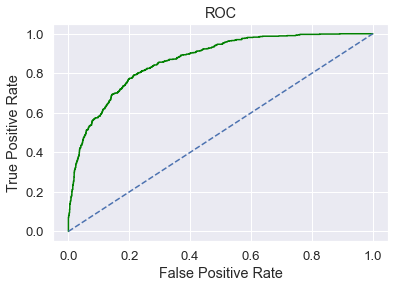

In [312]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

## RF Model Performance Evaluation on Test data

In [313]:
confusion_matrix(test_labels,ytest_predict)

array([[484,  84],
       [114, 160]], dtype=int64)

In [314]:
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

0.7648456057007126

In [315]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       568
           1       0.66      0.58      0.62       274

    accuracy                           0.76       842
   macro avg       0.73      0.72      0.72       842
weighted avg       0.76      0.76      0.76       842



In [316]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.66
rf_test_recall  0.58
rf_test_f1  0.62


Area under Curve is 0.8015671584250026


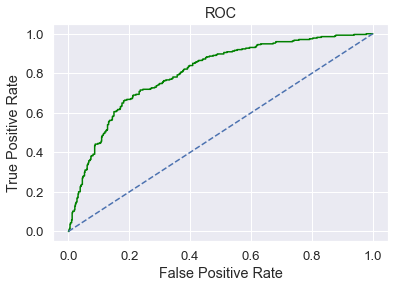

In [317]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

In [318]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.289685
Product Name  0.285042
Sales         0.184766
Duration      0.083533
Age           0.065314
Commision     0.062164
Destination   0.016768
Type          0.010427
Channel       0.002300


## Building a Neural Network Classifier

In [319]:
from sklearn.neural_network import MLPClassifier


In [320]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_trains = sc.fit_transform(X_train) 
X_tests = sc.transform (X_test)

In [321]:
param_grid = {
    'hidden_layer_sizes': [100, 50, 200, (100,100,100)],
    'max_iter': [2500,5000,2500],
    'solver': ['adam','sgd'],
    'tol': [0.01,0.001], 
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

In [322]:
grid_search.fit(X_train, train_labels)
grid_search.best_params_

{'hidden_layer_sizes': 200, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

In [323]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(hidden_layer_sizes=200, max_iter=2500, random_state=1, tol=0.01)

## Predicting the Training and Testing data

In [324]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

##  NN Model Performance Evaluation on Training data

In [325]:
confusion_matrix(train_labels,ytrain_predict)

array([[1191,  132],
       [ 324,  316]], dtype=int64)

In [326]:
nn_train_acc=best_grid.score(X_train,train_labels) 
nn_train_acc

0.7677024961793174

In [327]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84      1323
           1       0.71      0.49      0.58       640

    accuracy                           0.77      1963
   macro avg       0.75      0.70      0.71      1963
weighted avg       0.76      0.77      0.76      1963



In [328]:
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.71
nn_train_recall  0.49
nn_train_f1  0.58


Area under Curve is 0.8047914304610734


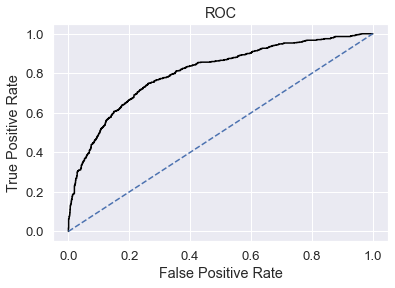

In [329]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', nn_train_auc)

## NN Model Performance Evaluation on Test data

In [330]:
confusion_matrix(test_labels,ytest_predict)

array([[504,  64],
       [144, 130]], dtype=int64)

In [331]:
nn_test_acc=best_grid.score(X_test,test_labels)
nn_test_acc

0.7529691211401425

In [738]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       568
           1       0.67      0.47      0.56       274

    accuracy                           0.75       842
   macro avg       0.72      0.68      0.69       842
weighted avg       0.74      0.75      0.74       842



In [332]:
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.67
nn_test_recall  0.47
nn_test_f1  0.56


Area under Curve is 0.7858024056749255


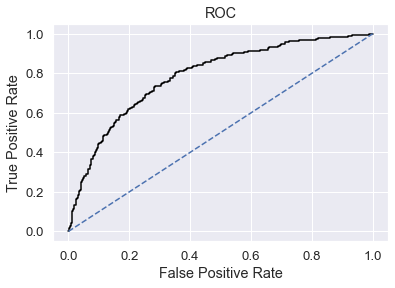

In [333]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', nn_test_auc)

In [334]:
best_grid.score

<bound method ClassifierMixin.score of MLPClassifier(hidden_layer_sizes=200, max_iter=2500, random_state=1, tol=0.01)>

## Neural Network Conclusion

## Final Conclusion
## Comparison of the performance metrics from the 3 models

In [335]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.79,0.75,0.80,0.76,0.77,0.75
AUC,0.83,0.78,0.87,0.80,0.80,0.79
Recall,0.56,0.51,0.62,0.58,0.49,0.47
Precision,0.72,0.65,0.73,0.66,0.71,0.67
F1 Score,0.63,0.58,0.67,0.62,0.58,0.56


## ROC Curve for the 3 models on the Training data

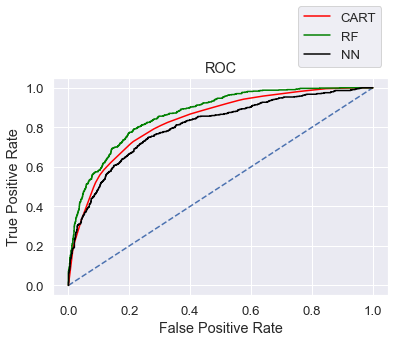

In [336]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

## ROC Curve for the 3 models on the Test data

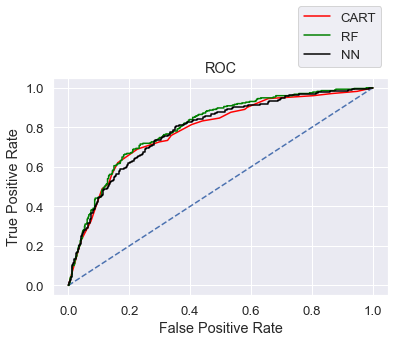

In [337]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

# 	Since we are considering the Recall value for the efficient prediction of claim frequency in the given data, we hereby conclude that RANDOM FOREST is the mathematical for training and testing the data for further prediction claim as we are getting the highest value of Recall and highest AUC Score in ROC curve amongst different models we used for the training and testing of data